One thing to consider is that a lot of recommender systems disregard user data from users with very few interactions due to the "cold start problem." Happens when the system doesnt have enough data to work with  

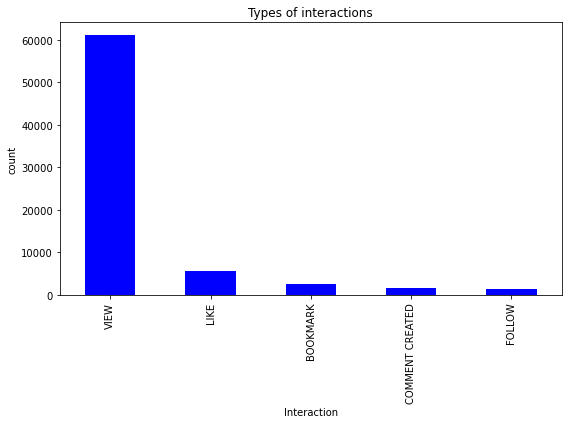

Distinct users: 	1895


count    1895.000000
mean       38.159367
std       104.143355
min         1.000000
25%         3.000000
50%        10.000000
75%        32.000000
max      1885.000000
Name: contentId, dtype: float64

In [16]:
#Exploratory / preprocessing for user data 

import pandas as pd
from datetime import datetime
import re
import matplotlib.pyplot as plt

#reading in data
interactions_df = pd.read_csv('/Users/kaileyfitzgerald/Desktop/ML and Data Sci/final projrct/users_interactions.csv')

#Interaction types
interaction_types_df = interactions_df.groupby('eventType').size().sort_values(ascending=False)

#plot interactions bar graph
plt.figure(figsize=(8, 6))
interaction_types_df.plot(kind='bar', color='blue')

plt.xlabel('Interaction')
plt.ylabel('count')
plt.title('Types of interactions')
plt.tight_layout()
plt.show()


#number of distinct users
print('Distinct users: \t%d' % len(interactions_df['personId'].unique()))
interactions_df.groupby('personId')['contentId'].size().describe()

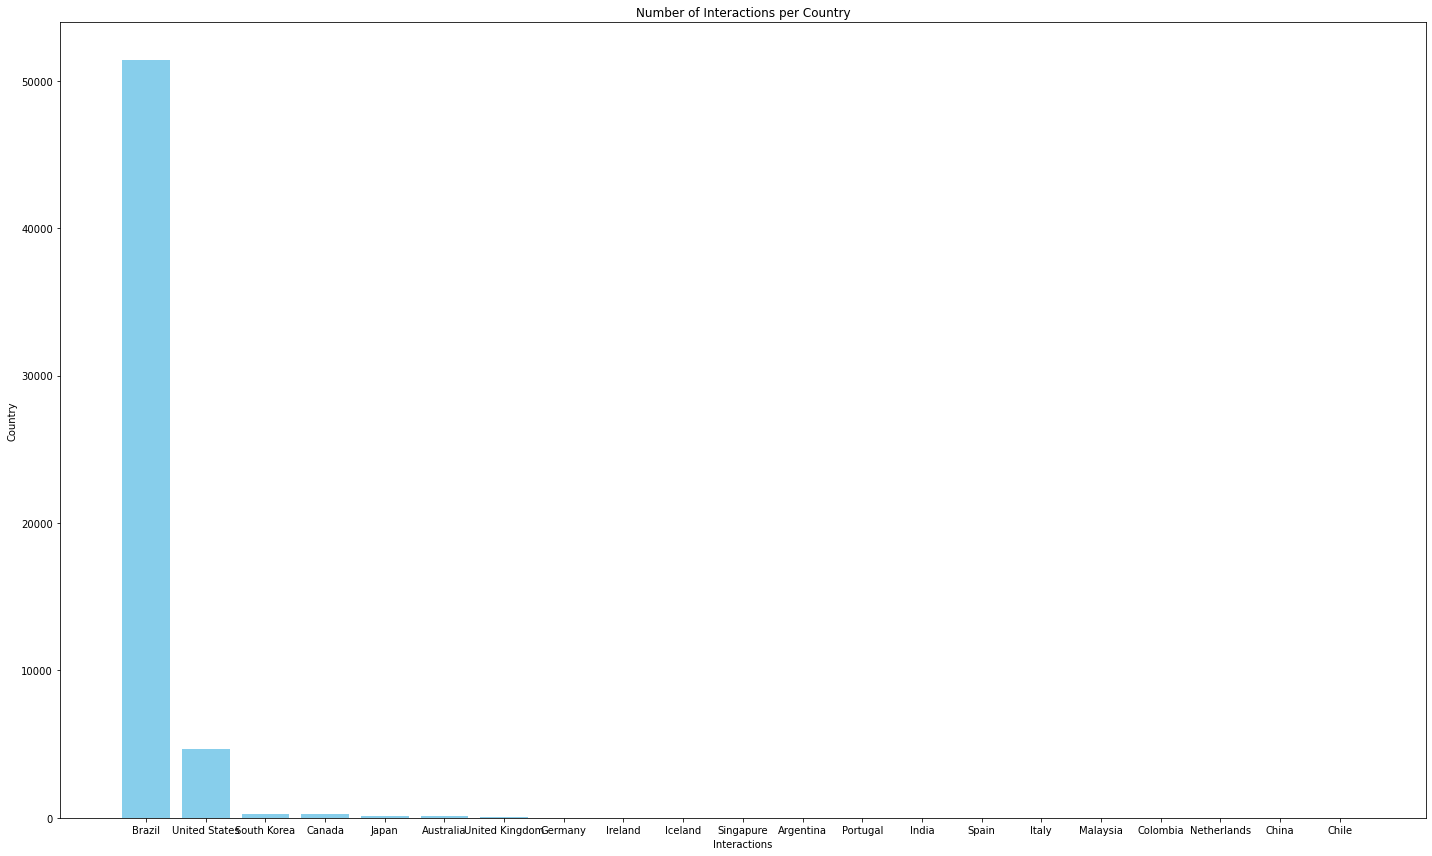

In [17]:
#looking at demographics of where they are from

country_code_dict = {
    'BR': ('BRA', 'Brazil'),
    'US': ('USA', 'United States'),
    'KR': ('KOR', 'South Korea'),
    'CA': ('CAN', 'Canada'),
    'JP': ('JPN', 'Japan'),
    'AU': ('AUS', 'Australia'),
    'GB': ('GBR', 'United Kingdom'),
    'DE': ('DEU', 'Germany'),
    'DE': ('DEU', 'Germany'),
    'IE': ('IRL', 'Ireland'),
    'IS': ('ISL', 'Iceland'),
    'SG': ('SGP', 'Singapure'),
    'AR': ('ARG', 'Argentina'),
    'PT': ('PRT', 'Portugal'),
    'IN': ('IND', 'India'),
    'ES': ('ESP', 'Spain'),
    'IT': ('ITA', 'Italy'),
    'MY': ('MYS', 'Malaysia'),
    'CO': ('COL', 'Colombia'),
    'CN': ('CHN', 'China'),
    'CL': ('CHL', 'Chile'),
    'NL': ('NLD', 'Netherlands')
}

interactions_df['countryName'] = interactions_df['userCountry'].apply(lambda x: country_code_dict[x][1] if x in country_code_dict else None)
interactions_by_country_df = pd.DataFrame(interactions_df.groupby('countryName').size() \
                            .sort_values(ascending=False).reset_index())
interactions_by_country_df.columns = ['country', 'count']
interactions_by_country_df

plt.figure(figsize=(20, 12)) 
plt.bar(interactions_by_country_df['country'], interactions_by_country_df['count'], color='skyblue')

plt.xlabel('Interactions')
plt.ylabel('Country')
plt.title('Number of Interactions per Country')

plt.tight_layout()
plt.show()



In [18]:
#assigning weights to different types of interactions 

event_type_strength = {
   'VIEW': 1.0,
   'LIKE': 2.0, 
   'BOOKMARK': 2.5, 
   'FOLLOW': 3.0,
   'COMMENT CREATED': 4.0,  
}

interactions_df['eventStrength'] = interactions_df['eventType'].apply(lambda x: event_type_strength[x])


In [19]:
#label encoder to convert everything to numbers 

from sklearn.preprocessing import LabelEncoder

user_transf = LabelEncoder()
interaction_transf = LabelEncoder()
country_transf = LabelEncoder()


# encoding
interactions_df['personId'] = user_transf.fit_transform(interactions_df['personId'])
interactions_df['eventType'] = interaction_transf.fit_transform(interactions_df['eventType'])
interactions_df['userCountry'] = country_transf.fit_transform(interactions_df['userCountry'])

# decoding
interactions_df['userCountry'] = country_transf.inverse_transform((interactions_df)['userCountry'])                                                              
interactions_df['eventType'] = interaction_transf.inverse_transform(interactions_df['eventType'])
interactions_df['personId'] = user_transf.inverse_transform((interactions_df)['personId'])
